In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv('../../../data/titanic.csv')

In [5]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

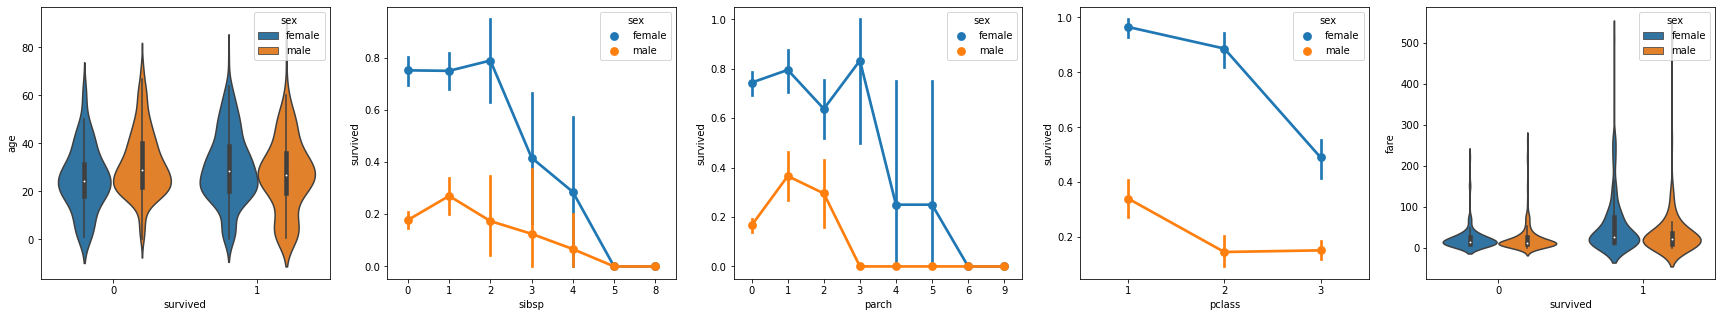

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [7]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [8]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [11]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [12]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [24]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
836/836 [==============================] - 1s 616us/step - loss: 0.5795 - accuracy: 0.7799
Epoch 2/50
836/836 [==============================] - 0s 52us/step - loss: 0.5507 - accuracy: 0.7811
Epoch 3/50
836/836 [==============================] - 0s 49us/step - loss: 0.5307 - accuracy: 0.7799
Epoch 4/50
836/836 [==============================] - 0s 49us/step - loss: 0.5180 - accuracy: 0.7799
Epoch 5/50
836/836 [==============================] - 0s 58us/step - loss: 0.5105 - accuracy: 0.7799
Epoch 6/50
836/836 [==============================] - 0s 57us/step - loss: 0.5053 - accuracy: 0.7799
Epoch 7/50
836/836 [==============================] - 0s 58us/step - loss: 0.5026 - accuracy: 0.7799
Epoch 8/50
836/836 [==============================] - 0s 72us/step - loss: 0.5000 - accuracy: 0.7799
Epoch 9/50
836/836 [==============================] - 0s 74us/step - loss: 0.4979 - accuracy: 0.7799
Epoch 10/50
836/836 [==============================] - 0s 63us/step - loss: 0.4961 - accur

In [30]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7894736842105263
